<a href="https://colab.research.google.com/github/GabrielYYM/Notebooks/blob/main/RevisitingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Base Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import DATASETS

In [ ]:
#imports
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
#load iris
iris = datasets.load_iris()
xi = iris.data
yi = iris.target

Xtr_i, Xte_i, Ytr_i, Yte_i = train_test_split(
    xi, yi, test_size = 0.3, random_state = 42, stratify = yi
)

In [ ]:
#load boston breast cancer
bc = datasets.load_breast_cancer()
xc = bc.data
yc = bc.target

Xtr_bc, Xte_bc, Ytr_bc, Yte_bc = train_test_split(
    xc, yc, test_size = 0.3, random_state = 42, stratify = yc
)

In [ ]:
#load Wine
wine = datasets.load_wine()
xw = wine.data
yw = wine.target

Xtr_w, Xte_w, Ytr_w, Yte_w = train_test_split(
    xw, yw, test_size = 0.3, random_state = 42, stratify = yw
)

# SMV

## Linear

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Iris Accuracy: 1.0


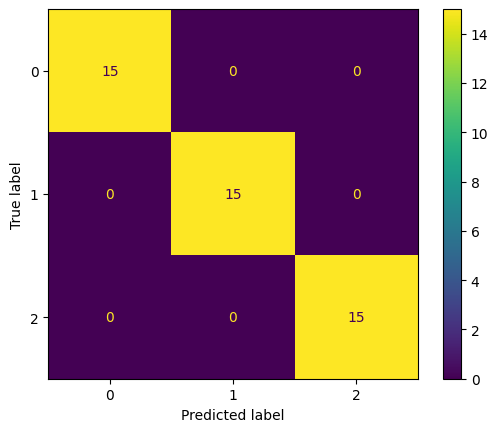

In [ ]:
#iris
model = SVC(kernel="linear", random_state=42)
model.fit(Xtr_i, Ytr_i)
Ypred_i = model.predict(Xte_i)
acc_i = accuracy_score (Yte_i, Ypred_i)
print("Iris Accuracy:",acc_i)
ConfusionMatrixDisplay.from_predictions(Yte_i, Ypred_i)


Brest cancer accuracy 0.9532163742690059


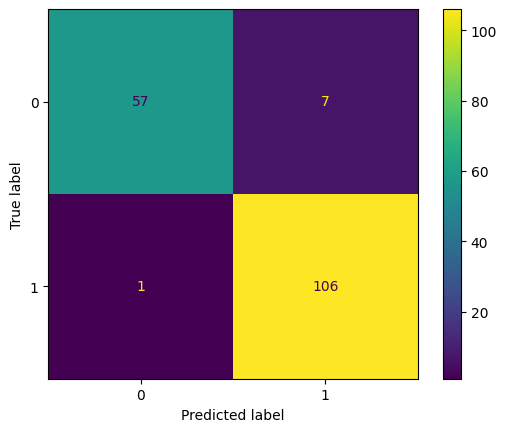

In [ ]:
#breast cancer
model = SVC(kernel="linear", random_state=42)
model.fit(Xtr_bc,Ytr_bc)
Ypred_bc = model.predict(Xte_bc)
acc_bc = accuracy_score (Yte_bc, Ypred_bc)
print("Brest cancer accuracy",acc_bc)
ConfusionMatrixDisplay.from_predictions(Yte_bc, Ypred_bc)

Wine accuracy 0.9444444444444444


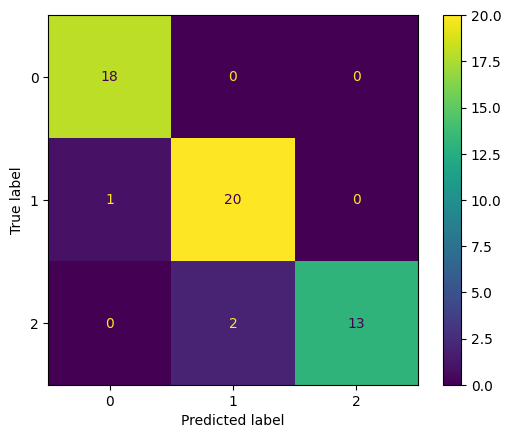

In [ ]:
#wine
model = SVC(kernel="linear", random_state=42)
model.fit(Xtr_w, Ytr_w)
Ypred_w = model.predict(Xte_w)
acc_w = accuracy_score (Yte_w, Ypred_w)
print("Wine accuracy",acc_w)
ConfusionMatrixDisplay.from_predictions(Yte_w, Ypred_w)

## RBF

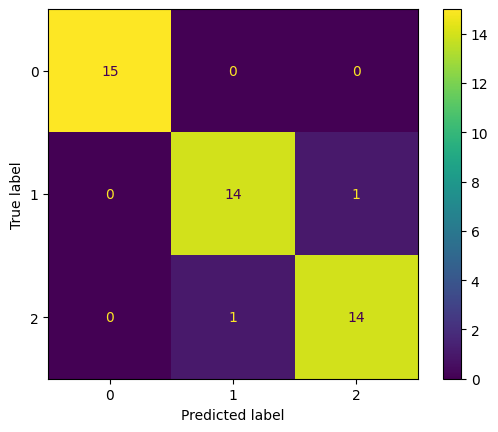

In [ ]:
#iris
model = SVC(kernel="rbf", random_state=42)
model.fit(Xtr_i, Ytr_i)
Ypred_i = model.predict(Xte_i)
acc_i = accuracy_score(Yte_i, Ypred_i)
ConfusionMatrixDisplay.from_predictions(Yte_i, Ypred_i)

breast cancer accuracy 0.9064327485380117


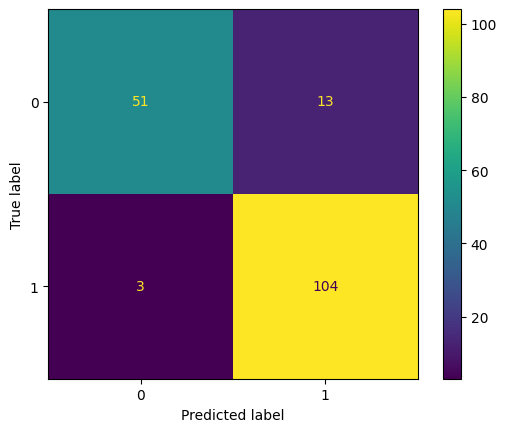

In [ ]:
#breast cancer
model = SVC(kernel="rbf", random_state=42)
model.fit(Xtr_bc, Ytr_bc)
Ypred_bc = model.predict(Xte_bc)
acc = accuracy_score(Yte_bc, Ypred_bc)
ConfusionMatrixDisplay.from_predictions(Yte_bc, Ypred_bc)
print("breast cancer accuracy", acc)

Wine accuracy: 0.6666666666666666


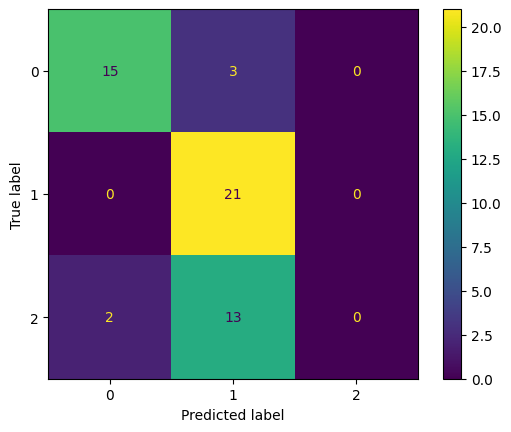

In [ ]:
#Wine
model=SVC(kernel="rbf", random_state=42)
model.fit(Xtr_w, Ytr_w)
Ypred_w = model.predict(Xte_w)
acc = accuracy_score(Yte_w, Ypred_w)
ConfusionMatrixDisplay.from_predictions(Yte_w, Ypred_w)
print("Wine accuracy:",acc)

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

GSCV iris accuracy 0.9555555555555556
best parameters {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


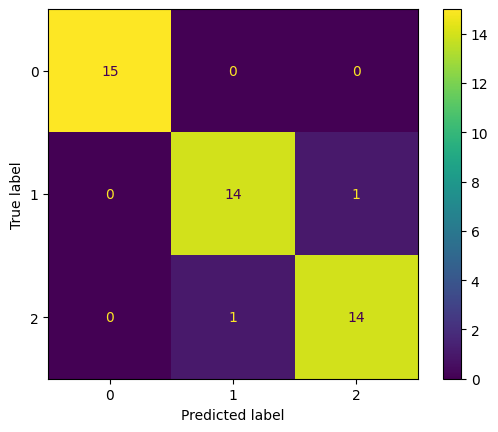

In [ ]:
gs_i = GridSearchCV(
    SVC(random_state=42),
    param_grid={"kernel":["linear","rbf","poly","sigmoid"],
                 "C":[0.1,1,10],
                 "gamma":["scale",0.1,1]},
    cv=5, n_jobs=-1
)
gs_i.fit(Xtr_i, Ytr_i)
Ypred_i = gs_i.predict(Xte_i)
acc = accuracy_score(Yte_i, Ypred_i)
ConfusionMatrixDisplay.from_predictions(Yte_i, Ypred_i)
print("GSCV iris accuracy",acc)
print("best parameters", gs_i.best_params_)

In [ ]:
#bostom
gs_bc = GridSearchCV(
    SVC(random_state=42),
    param_grid={"kernel":["linear","rbf","poly","sigmoid"],
        "C":[0.1,1,10],
        "gamma":["scale",0.1,1]},
    cv=5, n_jobs=-1
)
gs_bc.fit(Xtr_bc, Ytr_bc)
Ypred_bc = gs_bc.predict(Xte_bc)
acc = accuracy_score(Yte_bc, Ypred_bc)
print("acutarica bostom cancer",acc)
print("best parameters", gs_bc.best_params_)
ConfusionMatrixDisplay.from_predictions(Yte_bc, Ypred_bc)


KeyboardInterrupt: 

accuracia wine 0.9814814814814815
best parameters {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


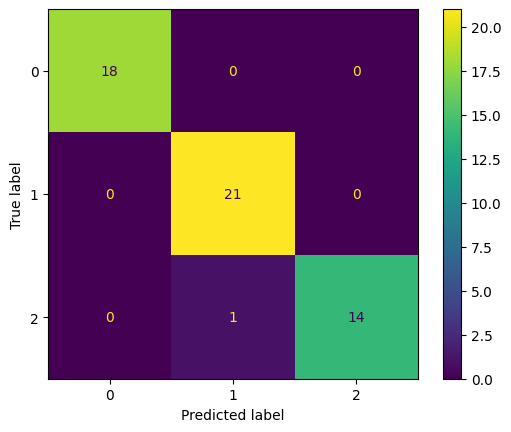

In [ ]:
#wine
gs_w = GridSearchCV(
    SVC(random_state=42),
    param_grid={"kernel":["linear","rbf","poly","sigmoid"],
                "C":[0.1,1,10],
                "gamma":["scale",0.1,1]},
    cv=5, n_jobs=-1
)
gs_w.fit(Xtr_w, Ytr_w)
Ypred_w = gs_w.predict(Xte_w)
acc = accuracy_score(Yte_w, Ypred_w)
print("accuracia wine",acc)
print("best parameters", gs_w.best_params_)
ConfusionMatrixDisplay.from_predictions(Yte_w, Ypred_w)

# Ensemble


## RandomForest

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

Iris accuracy: 1.0


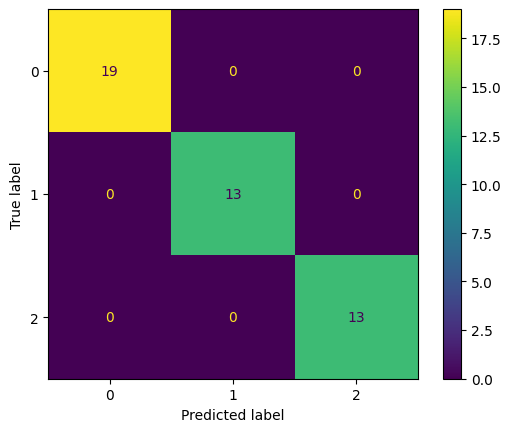

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

xi=df.drop("species", axis=1)
yi=df["species"]

Xtr_i, Xte_i, Ytr_i, Yte_i = train_test_split(xi, yi, test_size=0.3, random_state=42)

rf_i = RandomForestClassifier(
    n_estimators = 100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_i.fit(Xtr_i,Ytr_i)
Ypred_i=rf_i.predict(Xte_i)
acc = accuracy_score(Yte_i, Ypred_i)
ConfusionMatrixDisplay.from_predictions(Yte_i, Ypred_i)
print("Iris accuracy:",acc)

## GridSearch

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

xi=df.drop("species", axis=1)
yi=df["species"]

Xtr_i, Xte_i, Ytr_i, Yte_i = train_test_split(xi, yi, test_size=0.3, random_state=42)

rf_i = RandomForestClassifier(
    random_state=42,
)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(
    estimator=rf_i,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
grid_search.fit(Xtr_i, Ytr_i)

best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"  • {param}: {value}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
  • bootstrap: True
  • max_depth: None
  • max_features: sqrt
  • min_samples_leaf: 1
  • min_samples_split: 2
  • n_estimators: 100
